# Funciones de costo

En esta notebook veremos algunas funciones que aparecen en optimización, las veremos en el contexto de las redes neuronales.

## Funciones de costo: Son funciones que nos permiten estimar el costo de algo con la idea de tomar medidas para bajar el valor de dicho costo.


**Bibliografía:**

1. https://builtin.com/machine-learning/cost-function
2. https://www.datacamp.com/blog/classification-machine-learning
3. https://www.analyticssteps.com/blogs/7-types-cost-functions-machine-learning

En optimización el problema es encontrar una solución óptima a un dado problema. 
Cuán óptima es esta solución es descripto por una función llamada **costo**. 
La idea es encontrar el mínimo de esta función en algún dominio donde la misma esté definida. 

Aquí veremos dos casos de optimización:

1. **Regresión** Encontrar un modelo (una función) que mejor describa cierto conjunto de datos. 
2. **Clasificación** Encontrar un algoritmo que mejor particione un dado conjunto de datos. 

![Difference_between_Classification_and_Regression](Difference_between_Classification_and_Regression_98d8677bfd.png))

### 1. Regresión 

Veamos un ejemplo simple, dado un conjunto de datos, encontremos una función (llamado modelo o ley) que mejor los aproxime. 

Como ejemplo construiremos un dato artificial como una perturbación al azar de la función:

$$
y_e(x) = 1 + x + x^3
$$

El dato será:

$$
y = y_e(x) + r(x)
$$

Con $r$ es una distribución normal.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
N = 10
x = np.linspace(0, 1, N)

r = 0.1*np.random.normal(0, 0.3, N)
y = x**3 + x + 1 + r

def model(x,par):
    return par[0]*x**3 + par[1]*x + par[2]

    
ye = model(x,[1,1,1]) #ye = x**3 + x + 1
ym = model(x,[0.5,1,1]) #ym = x**3/2 x + 1 



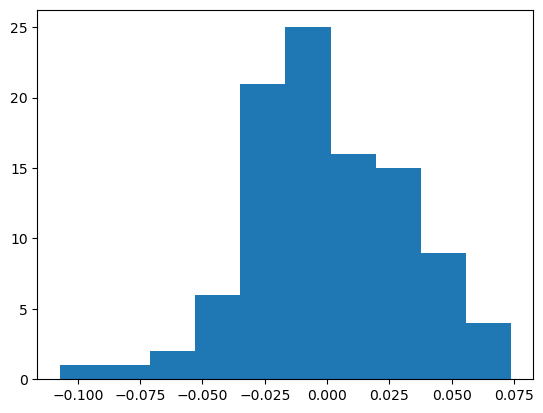

In [4]:
plt.hist(r)
plt.show()

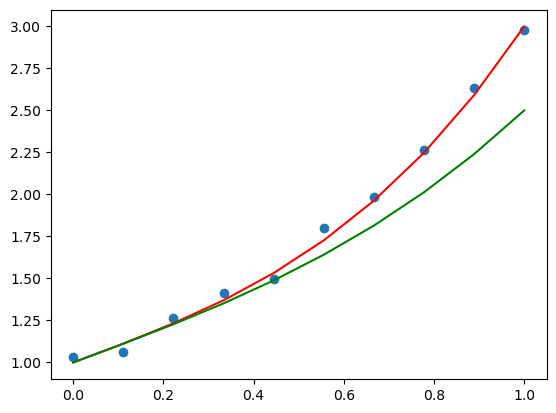

In [6]:
plt.scatter(x, y)
plt.plot(x, ye, color='r')
plt.plot(x, ym, color='g')
plt.show()

Cómo cuantificamos el error entre el modelo y los datos?

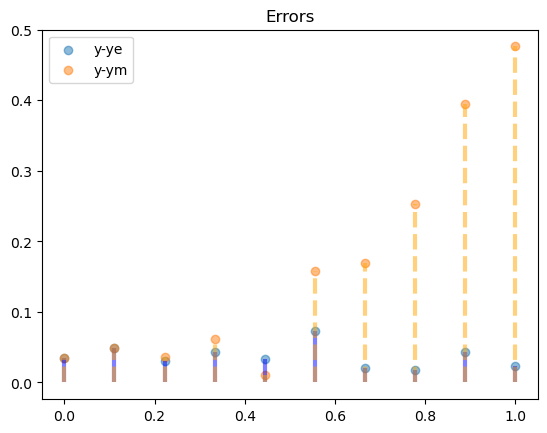

In [16]:
plt.scatter(x, np.abs(y-ye), label="y-ye", alpha=0.5)
plt.scatter(x, np.abs(y-ym), label="y-ym", alpha=0.5)
for i in range(0, len(x)):
    plt.vlines(x[i], 0, np.abs(y[i]-ye[i]), color='blue', alpha=0.5, lw=3)
    plt.vlines(x[i], 0, np.abs(y[i]-ym[i]), color='orange', alpha=0.5, linestyle='--', lw=3)

plt.title('Errors')
plt.legend()
plt.show()

#### Propuesta 1. 

Sumamos todos los errores elevamos al cuadrado y dividimos por el número de puntos.
Esta función costo se llama *MSE* (error cuadrático medio).

$$
MSE = \frac{\sum_{i=1}^N (y_i-ym(x_i))^2}{N}
$$

A $(y_i-ym(x_i))^2$ se lo llama la función de pérdida (loss function). La función de costo es el promedio de las
funciones de pérdidas aplicadas. 


In [9]:
def mse(y, y_hat):
    return np.sum((y-y_hat)**2)/len(y)

print("MSE(y, ye) = ", mse(y, ye))
print("MSE(y, ym) = ", mse(y, ym))

MSE(y, ye) =  0.0004977805081249812
MSE(y, ym) =  0.04690637262354361


Veamos como cambia esta función cuando cambiamos el primer parámetro:

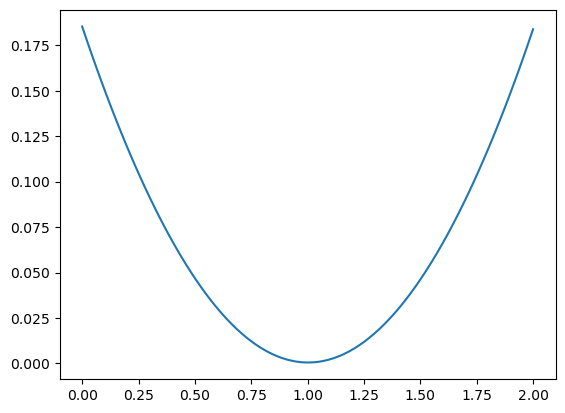

In [10]:
par_0 = np.linspace(0, 2, 100)

mse_vals = np.zeros(len(par_0))

for i in range(len(par_0)):
    mse_vals[i] = mse(y, model(x,[par_0[i],1,1]))

plt.plot(par_0, mse_vals, label="MSE(y, model)")

In [11]:
min_val = np.min(mse_vals)
min_idx = np.argmin(mse_vals)
print("Minimum value of MSE(y, model) = ", min_val)
print("Minimum value of par_0 = ", par_0[min_idx])

Minimum value of MSE(y, model) =  0.0005088364152968186
Minimum value of par_0 =  1.0101010101010102


### Contra: Muy sensible a cambios aleatorios grandes


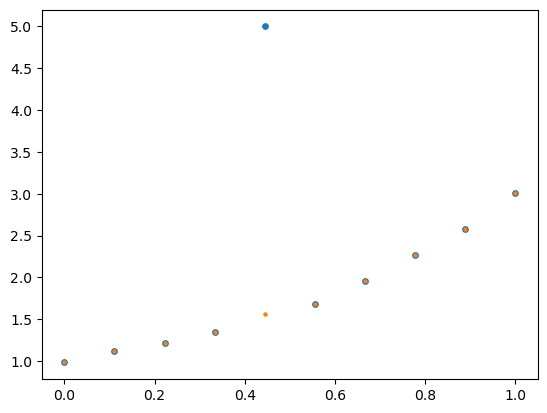

In [19]:
y_alt = y.copy()
y_alt[4] = 5

plt.scatter(x, y_alt, s=15, label="y_alt")
plt.scatter(x, y, s=5, label="y")
plt.show()

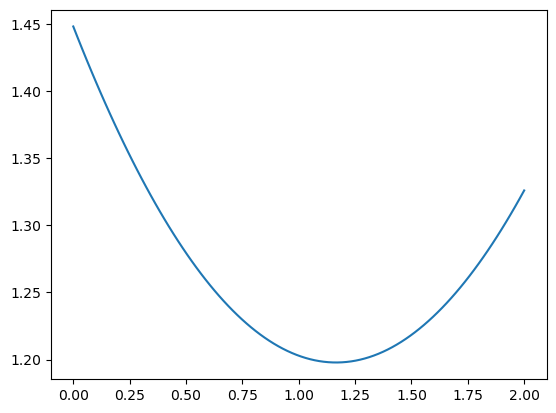

In [20]:
mse_vals_alt = np.zeros(len(par_0))
for i in range(len(par_0)):
    mse_vals_alt[i] = mse(y_alt, model(x,[par_0[i],1,1]))

plt.plot(par_0, mse_vals_alt, label="MSE(y_alt, model)")

In [21]:
min_val = np.min(mse_vals_alt)
min_idx = np.argmin(mse_vals_alt)
print("Minimum value of MSE(y, model) = ", min_val)
print("Minimum value of par_0 = ", par_0[min_idx])

Minimum value of MSE(y, model) =  1.197865012780364
Minimum value of par_0 =  1.1717171717171717


### Propuesta 2

Sumamos los valores absolutos (sin elevar al cuadrado)

$$
MAE = \frac{\sum_{i=1}^N |y_i-ym(x_i)|}{N}
$$

### Cons: No es diferenciable en el mínimo.
### Fab: No es sensible a cambios grandes.

In [22]:
def mae(y, y_hat):
    return np.sum(np.abs(y-y_hat))/len(y) 

print("MAE(y, ye) = ", mae(y, ye))  


MAE(y, ye) =  0.018730493271140923


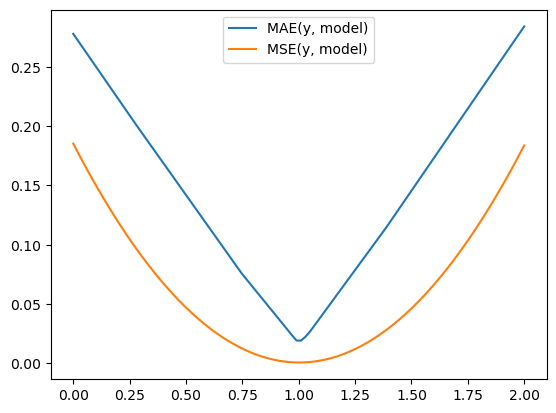

In [23]:
mae_vals = np.zeros(len(par_0))

for i in range(len(par_0)):
    mae_vals[i] = mae(y, model(x,[par_0[i],1,1]))

plt.plot(par_0, mae_vals, label="MAE(y, model)")
plt.plot(par_0, mse_vals, label="MSE(y, model)")
plt.legend()
plt.show()

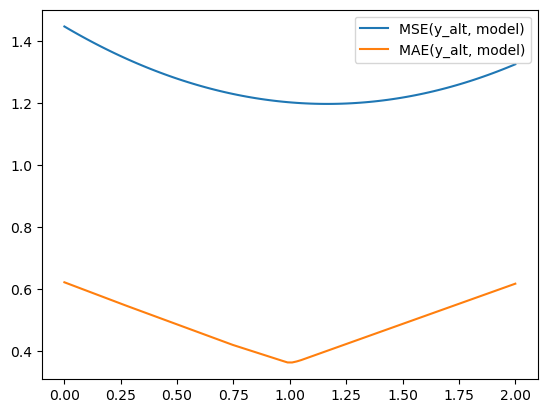

In [24]:
mae_vals_alt = np.zeros(len(par_0))
for i in range(len(par_0)):
    mae_vals_alt[i] = mae(y_alt, model(x,[par_0[i],1,1]))

plt.plot(par_0, mse_vals_alt, label="MSE(y_alt, model)")
plt.plot(par_0, mae_vals_alt, label="MAE(y_alt, model)")
plt.legend()
plt.show()

### Propuesta 3 Huber_loss

$$ 
huber\_loss(y,y_hat) = \left(
                \begin{align} 
                \frac{(y-\hat{y})^2}{2} & \;\;\;\;\;\; si \;\; |y - \hat{y}| < \delta \nonumber \\
                \delta |y - \hat{y}| + \delta^2/2 & \;\;\;\;\;\;\; si \;\; |y - \hat{y}| \leq \delta \nonumber
                \end{align}
                \right. 
                $$



In [27]:
def huber_loss(y, y_hat, delta=1.0):
    huber_mse = 0.5*(y-y_hat)**2
    huber_mae = delta * (np.abs(y - y_hat) - 0.5 * delta)
    return np.where(np.abs(y - y_hat) <= delta, huber_mse, huber_mae)

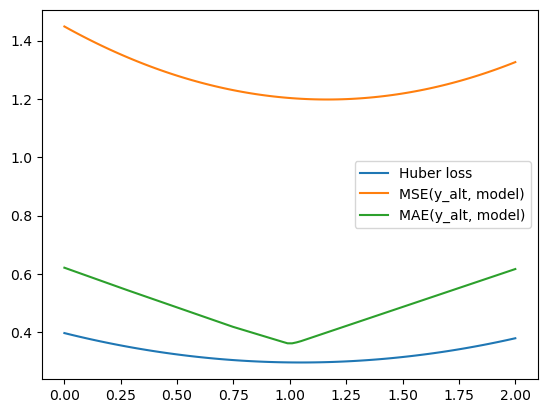

In [28]:
huber_loss_vals = np.zeros(len(par_0))
for i in range(len(par_0)):
    huber_loss_vals[i] = np.sum(huber_loss(y_alt, model(x,[par_0[i],1,1])))/len(y_alt)

plt.plot(par_0, huber_loss_vals, label="Huber loss")
plt.plot(par_0, mse_vals_alt, label="MSE(y_alt, model)")
plt.plot(par_0, mae_vals_alt, label="MAE(y_alt, model)")
plt.legend()
plt.show()

### 2. Clasificación: 

En este caso la función costo nos debe indicar cuando la probabilidad de acierto que se calcula se acerca o no a la probabilidad real.

#### Ejemplo: 

Supongamos que tenemos una red que clasifica imágenes por si hay o no un barco en ellas. Dada una foto la red nos dará una probabilidad (un número entre $0$ y $1$) que nos dirá cuan probable es que el barco esté en la imagen. En ese caso tenemos que comparar esa probabilidad con alguna que tendremos como correcta para el conjunto de entrenamiento (que contendrá dicha imagen). 





![barcos](Binary_classification_task_ec3247c7d2.png)

![clasificación méltiple](3_class_classification_task_a2ce612356.png)

![One vs one](One_vs_one_illustration_f7d4dfe71d.png)

![One vs rest](One_vs_rest_illustration_f0f4bd6daf.png)

![clasificación multiple](4_label_classification_task_d192b61741.png)

### Función de la entropía cruzada.

Es una función de costo dada por:

$$ 
f(p,q) = -\frac{\sum_{i=1}^N p_i log(q_i)}{N}
$$

donde:
1. $\{p_i\}$ conjunto de probabilidades reales (típicamente $1$ o $0$) 
2. $\{q_i\}$ conjunto de probabilidades predichas (números entre 0 y 1)



#### Ejemplo: 

Estamos clasificando imágenes de [`barcos`, `camiones` y `aeroplanos`]. 
Para una imagen dada el algoritmo nos da $q = [0.8,0.1,0.1]$ y como sabemos que es un `barco` tenemos que $p = [1,0,0]$

Por lo tanto la contribución de esta instancia a la función costo es:

$$
-log(0.8)/N = 0.2231 / N
$$

(Recuerde que $log(0) = 1$ y $log(0) = -\infty$)

Si en la imagen hay un `barco` y un `aeroplano` ($p=[1,0,1]$ y el algorimo da $q = [0.8,0.1,0.7]$, la contribución es:

$$
-log(0.8)/N -log(0.7)/N = 0.5798 / N
$$

O sea se cuentan como si fuesen dos imágenes separadas.

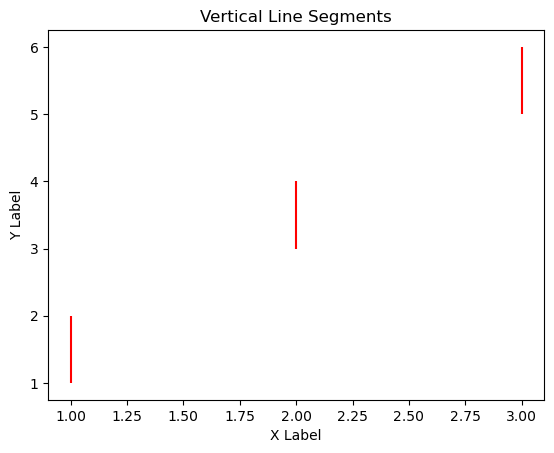

In [5]:
# Define vertical line segments
segments = [(1, 1, 2), (2, 3, 4), (3, 5, 6)]

# Create plot
fig, ax = plt.subplots()
ax.vlines(x=[s[0] for s in segments], ymin=[s[1] for s in segments], ymax=[s[2] for s in segments], colors='r')

# Add labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_title('Vertical Line Segments')

# Show plot
plt.show()